In [1]:
# Packages
import jsonlines
import nltk

from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as mpl     # Für Visualisierung
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
from __future__ import print_function
import ipywidgets as widgets

#Packages für Datenvisualisierung
import plotly
import plotly_express as px
import plotly.graph_objects as go

# Loading the Data

In [4]:
# df Legislaturperiode 2019 (24.10.2017-26.09.21)
df19 = pd.read_json('/Users/Paulahofmann/OneDrive/Uni/2. Lernpools Master/3. Semester/Soziologie/Data/speeches_19.jsonl', lines=True)
df19['date'] = pd.to_datetime(df19['date'])
df19.sort_values(by='date')

#Nach Recherche wird zuerst nur Datensatz über die 218.Sitzung gedownloadet. hier insbesondere der Zusatzpunkt 6: 
df_corona = df19[df19['date']=="2021-03-25"]
df_corona = df_corona[df_corona['discussion_title']=="Zusatzpunkt 6 2021-03-25"]

# Zwischenspeichern des Originaldatensatzes
df_corona1 = df_corona

#Ausgabe der ersten 3 Zeilen
df_corona1.head (3)

df_corona1.shape

(16, 8)

In [6]:
#Jeden Satz als einzelne Zeile. Nach "." erfolgt Trennung. 
df_corona['text'] = df_corona['text'].str.split('[.]')
df_corona = df_corona.explode('text').reset_index(drop=True)
cols = list(df_corona.columns)
cols.append(cols.pop(cols.index('name')))
df_corona = df_corona[cols]

#Ausgabe der ersten 3 Zeilen
df_corona.head (3)
df_corona.shape

(963, 8)

,text,id,period,date,party,redner_id,discussion_title,name,Clean_Text
0,Sehr geehrter Herr Präsident! Liebe Kolleginne...,ID1921800100,19,2021-03-25,CDU/CSU,11001478,Zusatzpunkt 6 2021-03-25,Angela Merkel,sehr geehrter herr präsident! liebe kolleginne...
1,Das wird er auch in diesem Jahr tun,ID1921800100,19,2021-03-25,CDU/CSU,11001478,Zusatzpunkt 6 2021-03-25,Angela Merkel,das wird er auch in diesem jahr tun
2,Aber genauso wie beim Europäischen Rat im Mär...,ID1921800100,19,2021-03-25,CDU/CSU,11001478,Zusatzpunkt 6 2021-03-25,Angela Merkel,aber genauso wie beim europäischen rat im mär...


# Data Processing

In [7]:
# Text Preprocessing für Modell, alles kleinschreiben
#def clean_text(text):
    #text = str.lower(text)
    #return text

#df_corona["Clean_Text"] = df_corona['text'].map(lambda text: clean_text(text))

df_corona["Clean_Text"] = df_corona['text']

#df_corona.head (3)

<Axes: ylabel='party'>

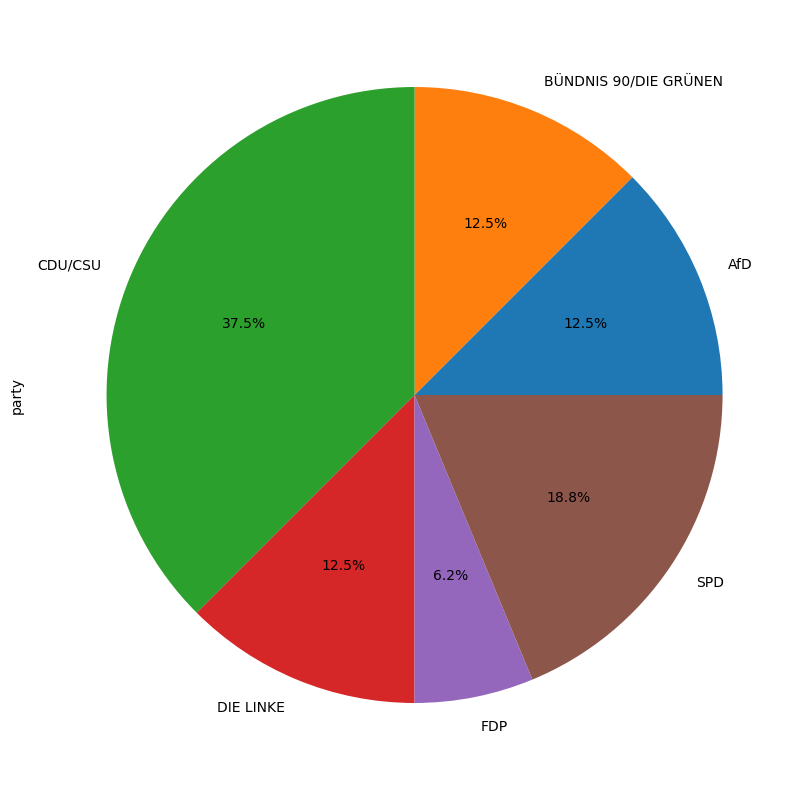

In [13]:
#Anzahl an Reden in Panda Data Frame festhalten
Series = pd.Series(df_corona1['party'].value_counts())
series19 = Series.sort_index(ascending=True)
series19.plot.pie(y='party',figsize=(10, 10), autopct='%1.1f%%')


# Sentiment Analyse mit Hugging Face´s Pipeline

In [14]:
from transformers import pipeline
from germansentiment import SentimentModel


In [15]:
corpus = list(df_corona['Clean_Text'].values)

print (corpus [2])

 Aber genauso wie beim Europäischen Rat im März vergangenen Jahres, als Europa am Beginn einer weltumspannenden Pandemie stand, deren Wucht uns damals allen völlig neu war, eine Pandemie von ungeahntem Ausmaß, zeigt die Tatsache, dass wir wieder in digitalem Format tagen werden, dass die Pandemie leider bei Weitem noch nicht überwunden ist


In [ ]:
nlp_sentiment = pipeline("sentiment-analysis", model='oliverguhr/german-sentiment-bert')

df_corona["Sentiment"] = nlp_sentiment(corpus)

# The pipeline's sentiment analysis output consists of a label and a score
# I prefer to extract them into separate columns


In [ ]:
df_corona['Sentiment_Label'] = [x.get('label') for x in df_corona['Sentiment']]

df_corona['Sentiment_Score'] = [x.get('score') for x in df_corona['Sentiment']]

df_corona.head()

df_corona['Sentiment_Label'].value_counts()

df_corona.to_csv ('Analyse')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
